In [1]:
# Let the games begin

import copy

from TicTacToe import TicTacToe
from Agent import RandomAgent, HumanAgent
from DeepQAgent import DeepQLearningAgent, DeepQPlayingAgent

params = {
    'nr_of_episodes' : 500000, # number of episodes for training
    'width' : 3, # width of the board, width = height

    'epsilon_start' : 0.15,  # initial exploration rate
    'epsilon_min' : 0.005, # minimum exploration rate
    'alpha_start' : 0.1,  # initial learning rate
    'alpha_min' : 0.1, # minimum learning rate
    'gamma' : 0.9,  # discount factor

    'switching' : False, # switch between X and O
    'debug' : False, # print debug messages

    # Parameters for QAgent
    'lazy_evaluation' : True, # use lazy evaluation
    'Q_initial_value' : 0.0, # initial Q value
    'terminal_q_updates' : False, # flag to switch between terminal and immediate Q updates

    # Parameters for DeepQAgent
    'batch_size' : 16, # batch size for deep learning
    'target_update_frequency' : 20, # target network update frequency
    'evaluation' : True, # save data for evaluation
    'double_q_learning' : False, # flag to switch on double Q-learnning
    'device' : 'cpu', # device to use, 'cpu' or 'mps' or 'cuda' 
    }

width = 3
win_length = 3
nr_of_episodes = 15000
params['nr_of_episodes'] = nr_of_episodes
params['width'] = width

paramsX = copy.deepcopy(params)
paramsO = copy.deepcopy(params)
paramsX['player'] = 'X'
paramsO['player'] = 'O'

outcomes = {'X' : 0, 'O' : 0, 'D' : 0, 'I' : 0}

learning_agent1 = DeepQLearningAgent(paramsX)
learning_agent2 = DeepQLearningAgent(paramsO)
random_agent2 = RandomAgent(player='O', switching=False)

game = TicTacToe(learning_agent1, random_agent2, display=False, width=width, height=width, win_length=win_length)
# game = TicTacToe(learning_agent1, learning_agent2, display=False, width=width, height=width, win_length=win_length)

for episode in range(nr_of_episodes):
    outcome = game.play()
    outcomes[outcome] += 1

print("Outcomes during learning:")
print(f"X wins: {outcomes['X']/nr_of_episodes}, O wins: {outcomes['O']/nr_of_episodes}, draws: {outcomes['D']/nr_of_episodes}, invalid moves: {outcomes['I']/nr_of_episodes}")

Outcomes during learning:
X wins: 0.9164, O wins: 0.036333333333333336, draws: 0.013866666666666666, invalid moves: 0.0334


In [4]:
q_network1 = learning_agent1.q_network
playing_agent1 = DeepQPlayingAgent(q_network1, player='X', switching=False)
random_agent2 = RandomAgent(player='O', switching=False)

game = TicTacToe(playing_agent1, random_agent2, display=False, width=width, height=width, win_length=win_length)
nr_of_episodes = 1000
outcomes = {'X' : 0, 'O' : 0, 'D' : 0, 'I' : 0}
for episode in range(nr_of_episodes):
    outcome = game.play()
    outcomes[outcome] += 1

print("Outcomes during playing:")
print(f"X wins: {outcomes['X']/nr_of_episodes}, O wins: {outcomes['O']/nr_of_episodes}, draws: {outcomes['D']/nr_of_episodes}, invalid moves: {outcomes['I']/nr_of_episodes}")

q_network2 = learning_agent2.q_network
playing_agent2 = DeepQPlayingAgent(q_network2, player='O', switching=False)
random_agent1 = RandomAgent(player='X', switching=False)

game = TicTacToe(random_agent1, playing_agent2, display=False, width=width, height=width, win_length=win_length)
nr_of_episodes = 1000
outcomes = {'X' : 0, 'O' : 0, 'D' : 0, 'I' : 0}
for episode in range(nr_of_episodes):
    outcome = game.play()
    outcomes[outcome] += 1

print("Outcomes during playing:")
print(f"X wins: {outcomes['X']/nr_of_episodes}, O wins: {outcomes['O']/nr_of_episodes}, draws: {outcomes['D']/nr_of_episodes}, invalid moves: {outcomes['I']/nr_of_episodes}")

game = TicTacToe(playing_agent1, playing_agent2, display=False, width=width, height=width, win_length=win_length)
nr_of_episodes = 1000
outcomes = {'X' : 0, 'O' : 0, 'D' : 0, 'I' : 0}
for episode in range(nr_of_episodes):
    outcome = game.play()
    outcomes[outcome] += 1

print("Outcomes during playing:")
print(f"X wins: {outcomes['X']/nr_of_episodes}, O wins: {outcomes['O']/nr_of_episodes}, draws: {outcomes['D']/nr_of_episodes}, invalid moves: {outcomes['I']/nr_of_episodes}")

Outcomes during playing:
X wins: 0.989, O wins: 0.001, draws: 0.009, invalid moves: 0.001
Outcomes during playing:
X wins: 0.0, O wins: 0.0, draws: 0.0, invalid moves: 1.0
Outcomes during playing:
X wins: 0.0, O wins: 0.0, draws: 0.0, invalid moves: 1.0


Number of losses: 51430
Number of action values: 51430
Number of rewards: 66445


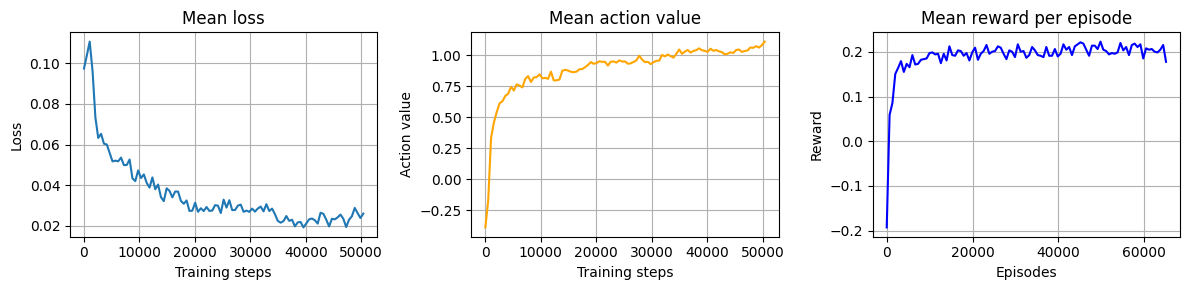

Number of losses: 0
Number of action values: 0
Number of rewards: 0


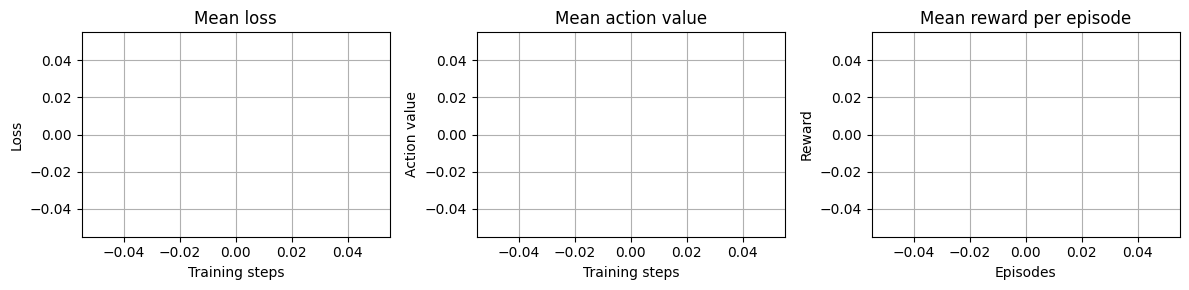

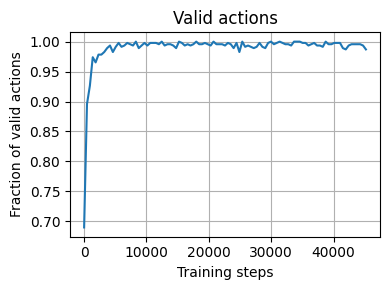

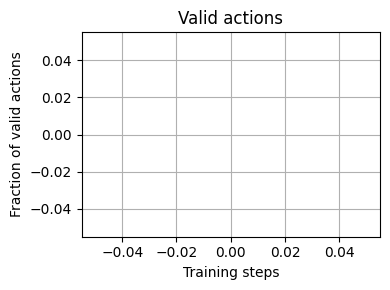

In [3]:
from Evaluation import plot_evaluation_data, plot_valid_actions

plot_evaluation_data(learning_agent1)
plot_evaluation_data(learning_agent2)

plot_valid_actions(learning_agent1)
plot_valid_actions(learning_agent2)